# Name: Devashish
# Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud 
# Algorithms used: Random Forest, XG Boost, Cat Boost


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mlg-ulb/creditcardfraud

 99% 65.0M/66.0M [00:00<00:00, 227MB/s]
100% 66.0M/66.0M [00:00<00:00, 200MB/s]


In [ ]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 57 kB/s 


In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read file as dataframe
card = pd.read_csv('creditcard.csv')

In [ ]:
# Defining Features 
X = card.iloc[:,:-1]

# Defining Response Variables
y = card.iloc[:,-1]

## Train Test Split and Standard Scaling

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=2022,
                                                    shuffle=True,
                                                    stratify=y)

In [ ]:
# Standard Scaling
scaler = StandardScaler()
X_trn_scl = scaler.fit_transform(X_train)
X_tst_scl = scaler.transform(X_test)

## Grid Search with Random Forest Classifier

In [ ]:
kfold = StratifiedKFold(n_splits = 5, random_state = 2022, shuffle = True)
model_rc = RandomForestClassifier(random_state = 2022)
params = {'max_features': [4],
          'n_estimators': [100]}
gcv = GridSearchCV(model_rc, param_grid = params, cv = kfold, verbose = 3,
                   scoring='roc_auc')

In [ ]:
gcv.fit(X_trn_scl, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..max_features=4, n_estimators=100;, score=0.931 total time= 4.5min
[CV 2/5] END ..max_features=4, n_estimators=100;, score=0.947 total time= 4.3min
[CV 3/5] END ..max_features=4, n_estimators=100;, score=0.965 total time= 3.4min
[CV 4/5] END ..max_features=4, n_estimators=100;, score=0.936 total time= 3.1min
[CV 5/5] END ..max_features=4, n_estimators=100;, score=0.948 total time= 2.9min


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_features': [4], 'n_estimators': [100]},
             scoring='roc_auc', verbose=3)

In [ ]:
print("Best Params: ", gcv.best_params_)
print("Best Score: ", gcv.best_score_)

Best Params:  {'max_features': 4, 'n_estimators': 100}
Best Score:  0.9453457662258371


In [ ]:
best_rfc = gcv.best_estimator_
y_pred = best_rfc.predict(X_tst_scl)
print("ROC AUC Score for Random Forest: ", roc_auc_score(y_test, y_pred))

ROC AUC Score for Random Forest:  0.8367346938775511


## XG Boost

In [ ]:
xgb = XGBClassifier(random_state = 2022, use_label_encoder = False)
params = {'learning_rate': [0.3],
          'n_estimators': [100]}
gcv = GridSearchCV(xgb, param_grid = params, cv = kfold, scoring='roc_auc')

In [ ]:
gcv.fit(X_trn_scl, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=XGBClassifier(random_state=2022,
                                     use_label_encoder=False),
             param_grid={'learning_rate': [0.3], 'n_estimators': [100]},
             scoring='roc_auc')

In [ ]:
print("Best Params: ", gcv.best_params_)
print("Best Score: ", gcv.best_score_)

Best Params:  {'learning_rate': 0.3, 'n_estimators': 100}
Best Score:  0.9784899895916063


In [ ]:
best_xgb = gcv.best_estimator_
y_pred = best_xgb.predict(X_tst_scl)
print("ROC AUC Score for XGBoost Classifier: ", roc_auc_score(y_test, y_pred))

ROC AUC Score for XGBoost Classifier:  0.8367346938775511


## Catboost

In [ ]:
cb = CatBoostClassifier(random_state = 2022)
params = {'learning_rate': [0.3]}
gcv = GridSearchCV(cb, param_grid = params, cv = kfold, scoring='roc_auc')

In [ ]:
gcv.fit(X_trn_scl, y_train)

In [ ]:
print("Best Params: ", gcv.best_params_)
print("Best Score: ", gcv.best_score_)

Best Params:  {'learning_rate': 0.3}
Best Score:  0.9758338870549373


In [ ]:
best_cb = gcv.best_estimator_
y_pred = best_cb.predict(X_tst_scl)
print("ROC AUC Score for CatBoost Classifier: ", roc_auc_score(y_test, y_pred))

ROC AUC Score for CatBoost Classifier:  0.8775510204081632


ROC AUC Score for Random Forest:  0.8367346938775511

ROC AUC Score for XGBoost Classifier:  0.8367346938775511

ROC AUC Score for CatBoost Classifier:  0.8775510204081632

Since we get best score in Catboost, we continue with Catboost Classifier.

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[28432     0]
 [   12    37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       1.00      0.76      0.86        49

    accuracy                           1.00     28481
   macro avg       1.00      0.88      0.93     28481
weighted avg       1.00      1.00      1.00     28481

0.9995786664794073


## ROC

In [ ]:
y_pred_prob = best_cb.predict_proba(X_tst_scl)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

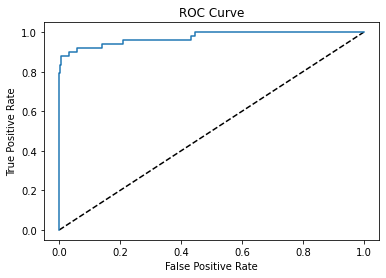

0.972942961652866

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

## Over Sampling (Naive)

In [ ]:
ros = RandomOverSampler(random_state=2022)
X_resampled, y_resampled = ros.fit_resample(X_trn_scl, y_train)

In [ ]:
gcv.fit(X_resampled, y_resampled)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.2895371	total: 138ms	remaining: 2m 17s
1:	learn: 0.1724621	total: 273ms	remaining: 2m 16s
2:	learn: 0.1256575	total: 401ms	remaining: 2m 13s
3:	learn: 0.1006015	total: 553ms	remaining: 2m 17s
4:	learn: 0.0858123	total: 687ms	remaining: 2m 16s
5:	learn: 0.0783248	total: 816ms	remaining: 2m 15s
6:	learn: 0.0686712	total: 976ms	remaining: 2m 18s
7:	learn: 0.0568933	total: 1.25s	remaining: 2m 35s
8:	learn: 0.0531109	total: 1.48s	remaining: 2m 42s
9:	learn: 0.0464082	total: 1.78s	remaining: 2m 56s
10:	learn: 0.0373677	total: 2.04s	remaining: 3m 3s
11:	learn: 0.0345501	total: 2.29s	remaining: 3m 8s
12:	learn: 0.0319410	total: 2.56s	remaining: 3m 14s
13:	learn: 0.0283796	total: 2.82s	remaining: 3m 18s
14:	learn: 0.0258646	total: 3.06s	remaining: 3m 21s
15:	learn: 0.0234580	total: 3.32s	remaining: 3m 24s
16:	learn: 0.0217804	total: 3.57s	remaining: 3m 26s
17:	learn: 0.0195999	total: 3.7s	remaining: 3m 22s
18:	learn: 0.0186206	total

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f633d564210>,
             param_grid={'learning_rate': [0.3]}, scoring='roc_auc')

In [ ]:
print("Best Params: ", gcv.best_params_)
print("Best Score: ", gcv.best_score_)

Best Params:  {'learning_rate': 0.3}
Best Score:  0.9999793347973341


In [ ]:
best_nv = gcv.best_estimator_
y_pred = best_nv.predict(X_tst_scl)
print("ROC AUC Score for Over Sampling (Naive): ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

ROC AUC Score for Over Sampling (Naive):  0.8774455054953889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.86      0.76      0.80        49

    accuracy                           1.00     28481
   macro avg       0.93      0.88      0.90     28481
weighted avg       1.00      1.00      1.00     28481



## Over Sampling (SMOTE)

In [ ]:
smote = SMOTE(random_state=2022)
X_resampled, y_resampled = smote.fit_resample(X_trn_scl, y_train)

In [ ]:
gcv.fit(X_resampled, y_resampled)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.2832914	total: 132ms	remaining: 2m 12s
1:	learn: 0.1757412	total: 260ms	remaining: 2m 9s
2:	learn: 0.1319803	total: 394ms	remaining: 2m 11s
3:	learn: 0.1152657	total: 515ms	remaining: 2m 8s
4:	learn: 0.1021146	total: 632ms	remaining: 2m 5s
5:	learn: 0.0902981	total: 752ms	remaining: 2m 4s
6:	learn: 0.0808902	total: 893ms	remaining: 2m 6s
7:	learn: 0.0765124	total: 998ms	remaining: 2m 3s
8:	learn: 0.0715209	total: 1.12s	remaining: 2m 3s
9:	learn: 0.0662921	total: 1.24s	remaining: 2m 2s
10:	learn: 0.0615811	total: 1.36s	remaining: 2m 2s
11:	learn: 0.0572138	total: 1.48s	remaining: 2m 2s
12:	learn: 0.0540816	total: 1.61s	remaining: 2m 2s
13:	learn: 0.0504863	total: 1.75s	remaining: 2m 3s
14:	learn: 0.0473166	total: 1.88s	remaining: 2m 3s
15:	learn: 0.0444281	total: 2s	remaining: 2m 3s
16:	learn: 0.0419284	total: 2.14s	remaining: 2m 3s
17:	learn: 0.0400922	total: 2.25s	remaining: 2m 3s
18:	learn: 0.0375246	total: 2.39s	remainin

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f633d564210>,
             param_grid={'learning_rate': [0.3]}, scoring='roc_auc')

In [ ]:
print("Best Params: ", gcv.best_params_)
print("Best Score: ", gcv.best_score_)

Best Params:  {'learning_rate': 0.3}
Best Score:  0.9999753639773641


In [ ]:
best_sm = gcv.best_estimator_
y_pred = best_sm.predict(X_tst_scl)
print("ROC AUC Score for Over Sampling (SMOTE): ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

ROC AUC Score for Over Sampling (SMOTE):  0.8873506282085147
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.62      0.78      0.69        49

    accuracy                           1.00     28481
   macro avg       0.81      0.89      0.85     28481
weighted avg       1.00      1.00      1.00     28481



## Over Sampling (ADASYN)

In [ ]:
adasyn = ADASYN(random_state=2021)
X_resampled, y_resampled = adasyn.fit_resample(X_trn_scl, y_train)

In [ ]:
gcv.fit(X_resampled, y_resampled)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.3946566	total: 124ms	remaining: 2m 4s
1:	learn: 0.2971044	total: 250ms	remaining: 2m 4s
2:	learn: 0.2360368	total: 375ms	remaining: 2m 4s
3:	learn: 0.1987412	total: 489ms	remaining: 2m 1s
4:	learn: 0.1752913	total: 626ms	remaining: 2m 4s
5:	learn: 0.1520127	total: 752ms	remaining: 2m 4s
6:	learn: 0.1405404	total: 875ms	remaining: 2m 4s
7:	learn: 0.1291157	total: 991ms	remaining: 2m 2s
8:	learn: 0.1178590	total: 1.1s	remaining: 2m 1s
9:	learn: 0.1105864	total: 1.21s	remaining: 1m 59s
10:	learn: 0.1010706	total: 1.34s	remaining: 2m
11:	learn: 0.0936509	total: 1.46s	remaining: 2m
12:	learn: 0.0867534	total: 1.58s	remaining: 1m 59s
13:	learn: 0.0799900	total: 1.71s	remaining: 2m
14:	learn: 0.0754928	total: 1.84s	remaining: 2m
15:	learn: 0.0718307	total: 2s	remaining: 2m 2s
16:	learn: 0.0677099	total: 2.12s	remaining: 2m 2s
17:	learn: 0.0619703	total: 2.25s	remaining: 2m 2s
18:	learn: 0.0589849	total: 2.38s	remaining: 2m 2s
19:	

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f633d564210>,
             param_grid={'learning_rate': [0.3]}, scoring='roc_auc')

In [ ]:
print("Best Params: ", gcv.best_params_)
print("Best Score: ", gcv.best_score_)

Best Params:  {'learning_rate': 0.3}
Best Score:  0.9999790955305328


In [ ]:
best_cb = gcv.best_estimator_
y_pred = best_cb.predict(X_tst_scl)
print("ROC AUC Score for Over Sampling (ADASYN): ", roc_auc_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

ROC AUC Score for Over Sampling (ADASYN):  0.8873682140273105
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.63      0.78      0.70        49

    accuracy                           1.00     28481
   macro avg       0.82      0.89      0.85     28481
weighted avg       1.00      1.00      1.00     28481

